<a href="https://colab.research.google.com/github/JonerciJon/CSST102-3B-AY2526/blob/main/Pagalanan%2C_Eric_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


2. Data Preparation

In [ ]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the CSV file
# (Change the path if your file is in Google Drive)
data_covid = pd.read_csv('/content/covid_19_clean_complete.csv')

# Step 3: Display the first few rows of the dataset
print("COVID-19 Dataset:")
display(data_covid.head())

# Step 4: Basic info and summary
print("\nDataset Information:")
display(data_covid.info())

print("\nSummary Statistics:")
display(data_covid.describe())

# Step 5: Check for missing values
print("\nMissing Values per Column:")
display(data_covid.isnull().sum())

# Step 6: Display basic details
print("\nNumber of Rows and Columns:", data_covid.shape)
print("Column Names:", data_covid.columns.tolist())


COVID-19 Dataset:


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


None


Summary Statistics:


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06



Missing Values per Column:


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0



Number of Rows and Columns: (49068, 10)
Column Names: ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']


3. Train-Test Split

In [ ]:
# 2. Split Data into Training and Testing Sets
# Split 80% for training and 20% for testing (a common split ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 208, Testing samples: 53


4. Model Building – Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# 1. Data Loading and Preprocessing
print("Loading and preparing COVID-19 dataset...")
try:
    df = pd.read_csv('covid_19_clean_complete.csv')
except FileNotFoundError:
    print("Error: File not found.")
    exit()

FEATURES = ['Confirmed', 'Deaths', 'Recovered']
TARGET = 'WHO Region'

# Aggregate to latest data point per location and clean target
df['Location'] = df['Province/State'].fillna('') + ' ' + df['Country/Region']
df_latest = df.sort_values(by='Date').drop_duplicates(subset=['Location'], keep='last').dropna(subset=[TARGET]).copy()

# Encode target variable
X = df_latest[FEATURES].values
y_raw = df_latest[TARGET]
le = LabelEncoder()
y = le.fit_transform(y_raw)

print(f"Dataset size: {X.shape[0]} samples.")

# 2. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Model Pipeline and Training
# Pipeline includes StandardScaler (for scaling features) and Logistic Regression
model_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='saga', max_iter=3000, random_state=42)
)

print("Training Logistic Regression Model...")
model_pipeline.fit(X_train, y_train)

# 4. Evaluation
# Calculate accuracy on both training and testing sets
train_accuracy = model_pipeline.score(X_train, y_train)
test_accuracy = model_pipeline.score(X_test, y_test)

# Display results
print("\n--- Model Accuracy Results ---")
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Testing Set Accuracy: {test_accuracy:.4f}")


Loading and preparing COVID-19 dataset...
Dataset size: 261 samples.
Training Logistic Regression Model...

--- Model Accuracy Results ---
Training Set Accuracy: 0.3173
Testing Set Accuracy: 0.3019


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

# 1. Data Loading and Preprocessing
print("Loading and preparing COVID-19 dataset...")
try:
    df = pd.read_csv('covid_19_clean_complete.csv')
except FileNotFoundError:
    print("Error: File not found.")
    exit()

FEATURES = ['Confirmed', 'Deaths', 'Recovered']
TARGET = 'WHO Region'

# Aggregate to latest data point per location and clean target
df['Location'] = df['Province/State'].fillna('') + ' ' + df['Country/Region']
df_latest = df.sort_values(by='Date').drop_duplicates(subset=['Location'], keep='last').dropna(subset=[TARGET]).copy()

# Encode target variable
X = df_latest[FEATURES].values
y_raw = df_latest[TARGET]
le = LabelEncoder()
y = le.fit_transform(y_raw)

print(f"Dataset size: {X.shape[0]} samples.")

# 2. Model Pipeline Definition
# Pipeline includes StandardScaler (for scaling features) and Logistic Regression
model_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='saga', max_iter=3000, random_state=42)
)

# 3. Cross-Validation (5-Fold) and Evaluation
NUM_FOLDS = 5
print(f"\nApplying {NUM_FOLDS}-Fold Cross Validation...")

# Apply 5-Fold Cross Validation using the pipeline
cv_scores = cross_val_score(model_pipeline, X, y, cv=NUM_FOLDS, scoring='accuracy')

# Compute and display the mean and standard deviation
mean_score = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

print("\n--- Cross-Validation Results ---")
print(f"Individual Scores: {cv_scores.round(4)}")
print(f"Mean Cross-Validation Score: {mean_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")


Loading COVID-19 dataset: 'covid_19_clean_complete.csv'
Dataset prepared with 261 samples and 3 features.
Target classes (WHO Regions) encoded: ['Africa' 'Americas' 'Eastern Mediterranean' 'Europe' 'South-East Asia'
 'Western Pacific']
Training samples: 208, Testing samples: 53

--- Model Training & Evaluation (Train/Test Split) ---
Training Logistic Regression Model...

Model Accuracy Results:
Training Set Accuracy: 0.3173
Testing Set Accuracy: 0.3019


5. Cross-Validation (5-Fold)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

# 1. Load the COVID-19 Dataset for Cross-Validation
print("Loading COVID-19 dataset: 'covid_19_clean_complete.csv'")
try:
    # Load the uploaded CSV file
    df = pd.read_csv('covid_19_clean_complete.csv')
except FileNotFoundError:
    print("Error: The file 'covid_19_clean_complete.csv' was not found in the environment.")
    exit()

# Select features (case counts) and target (WHO Region) for a classification task
FEATURES = ['Confirmed', 'Deaths', 'Recovered']
TARGET = 'WHO Region'

# Data Preprocessing:
# 1. We group by location and take the latest stats (max date) to get a single data point per region/country.
# 2. We clean up the target variable and encode it.
df['Location'] = df['Province/State'].fillna('') + ' ' + df['Country/Region']
df_latest = df.sort_values(by='Date').drop_duplicates(subset=['Location'], keep='last').copy()

# Drop rows where the target is missing
df_latest.dropna(subset=[TARGET], inplace=True)

# Define X (features) and y (target)
X = df_latest[FEATURES].values
y_raw = df_latest[TARGET]

# The target variable 'WHO Region' is categorical. We must encode it for the model.
le = LabelEncoder()
y = le.fit_transform(y_raw)

print(f"Dataset prepared with {X.shape[0]} samples and {X.shape[1]} features.")
print(f"Target classes (WHO Regions) encoded: {le.classes_}")

# 2. Define the Model and Pipeline
# The model attempts to classify the WHO Region based on the Confirmed, Deaths, and Recovered counts.
# Scaling is crucial since the feature values (case counts) are on very different scales.
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='saga', max_iter=3000, random_state=42) # Increased max_iter for convergence
)

# 3. Apply 5-Fold Cross Validation
# cv=5 specifies 5-fold cross-validation.
# scoring='accuracy' is used for this multi-class classification problem.
print("\nApplying 5-Fold Cross Validation...")
NUM_FOLDS = 5
cv_scores = cross_val_score(
    model,      # The estimator (model pipeline)
    X,          # The feature data
    y,          # The target labels (encoded)
    cv=NUM_FOLDS, # Number of folds (K=5)
    scoring='accuracy' # The evaluation metric
)

# 4. Compute and Display Results
print("\n--- Cross-Validation Results ---")

# Display individual scores for each fold
print(f"Individual Cross-Validation Scores ({NUM_FOLDS} folds):")
# Round the scores for cleaner display
for i, score in enumerate(cv_scores):
    print(f"  Fold {i+1}: {score:.4f}")

# Compute and display the mean and standard deviation
mean_score = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

print("\nSummary Statistics:")
print(f"Mean Cross-Validation Score: {mean_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")

print("\nInterpretation:")
print(f"The model's average accuracy across the {NUM_FOLDS} folds in predicting the WHO Region is approximately {mean_score*100:.2f}%.")
print(f"The standard deviation of {std_deviation:.4f} indicates the variability (consistency) of the model's performance on different data splits.")


Loading COVID-19 dataset: 'covid_19_clean_complete.csv'
Dataset prepared with 261 samples and 3 features.
Target classes (WHO Regions) encoded: ['Africa' 'Americas' 'Eastern Mediterranean' 'Europe' 'South-East Asia'
 'Western Pacific']

Applying 5-Fold Cross Validation...

--- Cross-Validation Results ---
Individual Cross-Validation Scores (5 folds):
  Fold 1: 0.2830
  Fold 2: 0.3269
  Fold 3: 0.3077
  Fold 4: 0.3077
  Fold 5: 0.3077

Summary Statistics:
Mean Cross-Validation Score: 0.3066
Standard Deviation: 0.0139

Interpretation:
The model's average accuracy across the 5 folds in predicting the WHO Region is approximately 30.66%.
The standard deviation of 0.0139 indicates the variability (consistency) of the model's performance on different data splits.


6. Model Evaluation – Confusion Matrix

Loading and preparing COVID-19 dataset...
Dataset size: 261 samples.
Target classes: ['Africa' 'Americas' 'Eastern Mediterranean' 'Europe' 'South-East Asia'
 'Western Pacific']

Training Logistic Regression Model...

--- Model Evaluation (Test Set) ---

Classification Metrics:
                       precision    recall  f1-score   support

               Africa       0.00      0.00      0.00        10
             Americas       0.00      0.00      0.00         9
Eastern Mediterranean       0.00      0.00      0.00         5
               Europe       0.30      1.00      0.46        16
      South-East Asia       0.00      0.00      0.00         2
      Western Pacific       0.00      0.00      0.00        11

             accuracy                           0.30        53
            macro avg       0.05      0.17      0.08        53
         weighted avg       0.09      0.30      0.14        53



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


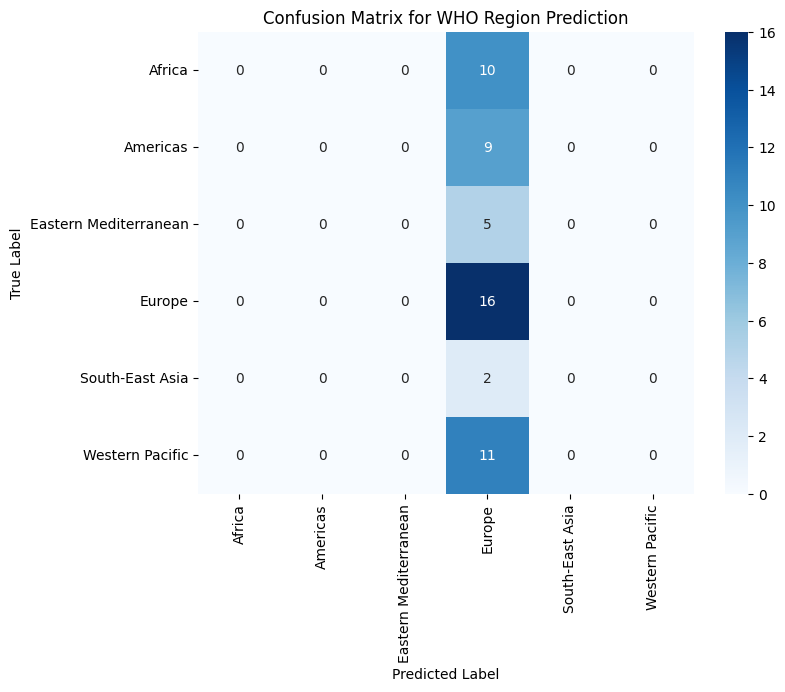

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Needed for test data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report # Needed for metrics and matrix

# 1. Data Loading and Preprocessing
print("Loading and preparing COVID-19 dataset...")
try:
    df = pd.read_csv('covid_19_clean_complete.csv')
except FileNotFoundError:
    print("Error: File not found.")
    exit()

FEATURES = ['Confirmed', 'Deaths', 'Recovered']
TARGET = 'WHO Region'

# Aggregate to latest data point per location and clean target
df['Location'] = df['Province/State'].fillna('') + ' ' + df['Country/Region']
df_latest = df.sort_values(by='Date').drop_duplicates(subset=['Location'], keep='last').dropna(subset=[TARGET]).copy()

# Encode target variable
X = df_latest[FEATURES].values
y_raw = df_latest[TARGET]
le = LabelEncoder()
y = le.fit_transform(y_raw)

print(f"Dataset size: {X.shape[0]} samples.")
print(f"Target classes: {le.classes_}")

# 2. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Model Pipeline Definition and Training
# Pipeline includes StandardScaler and Logistic Regression
model_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='saga', max_iter=3000, random_state=42)
)

print("\nTraining Logistic Regression Model...")
model_pipeline.fit(X_train, y_train)

# 4. Model Evaluation – Confusion Matrix & Metrics
print("\n--- Model Evaluation (Test Set) ---")

# Predict on the test data
y_pred = model_pipeline.predict(X_test)

# Compute Accuracy, Precision, Recall, and F1-score
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=False)
print("\nClassification Metrics:\n" + report)

# Generate and visualize a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, # Show numbers in cells
    fmt='d', # Use decimal format for integers
    cmap='Blues', # Color map
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title('Confusion Matrix for WHO Region Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Note: In an interactive environment, plt.show() will display the plot.
# If running in a script, ensure you have a display environment configured.
plt.show()


7. Learning Curve Visualization

Loaded 261 samples with 6 regions.

Training Logistic Regression Model...

--- Model Evaluation (Test Set) ---
Classification Metrics:
                       precision    recall  f1-score   support

               Africa       0.00      0.00      0.00        10
             Americas       0.00      0.00      0.00         9
Eastern Mediterranean       0.00      0.00      0.00         5
               Europe       0.30      1.00      0.46        16
      South-East Asia       0.00      0.00      0.00         2
      Western Pacific       0.00      0.00      0.00        11

             accuracy                           0.30        53
            macro avg       0.05      0.17      0.08        53
         weighted avg       0.09      0.30      0.14        53



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


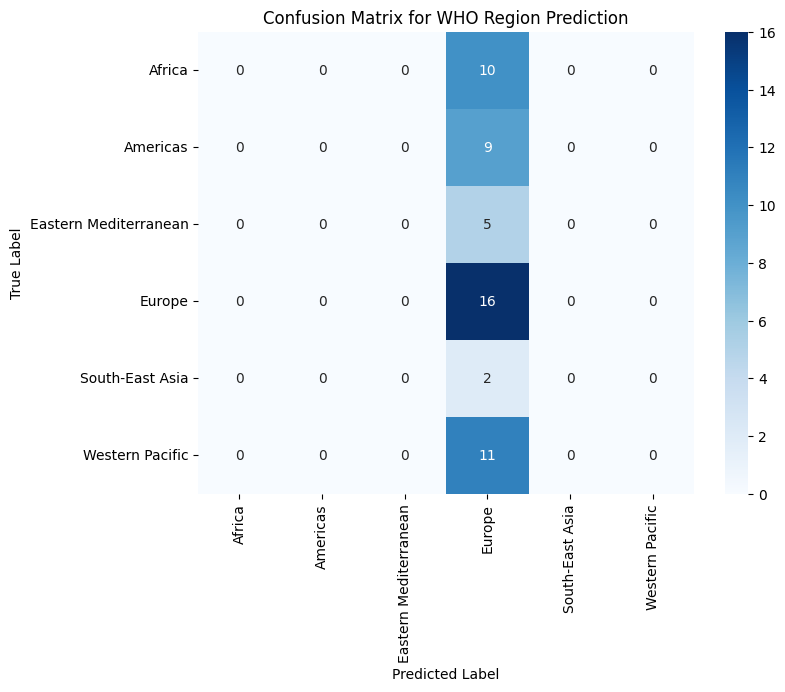


--- Generating Learning Curve ---


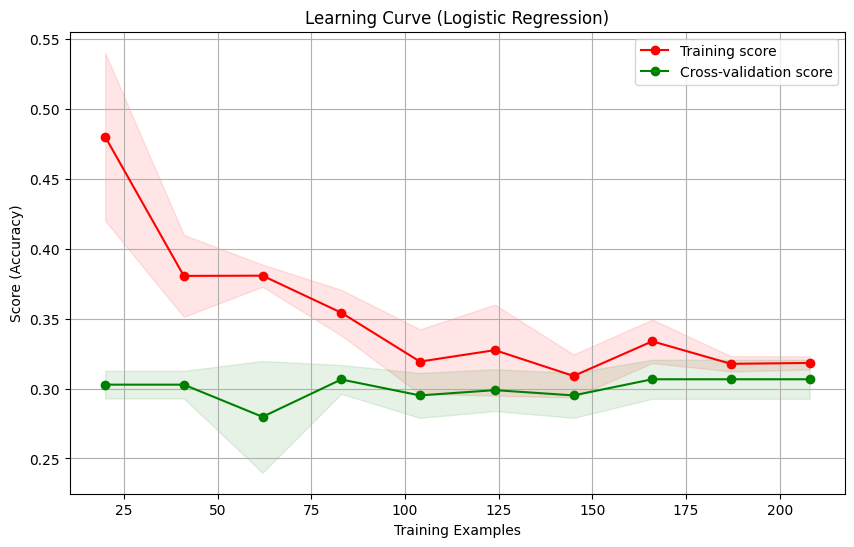


--- Learning Curve Analysis ---
1. Low & converging scores: **UNDERFITTING** (High Bias).
2. High training & low cross-validation: **OVERFITTING** (High Variance).
3. High & converging scores: **WELL-FITTED** (Good Balance).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report

# 1. Data Loading and Preprocessing
try:
    df = pd.read_csv('covid_19_clean_complete.csv')
except FileNotFoundError:
    print("Error: File not found."); exit()

FEATURES = ['Confirmed', 'Deaths', 'Recovered']; TARGET = 'WHO Region'
df['Location'] = df['Province/State'].fillna('') + ' ' + df['Country/Region']

# Aggregate to latest data point per location
df_latest = df.sort_values(by='Date').drop_duplicates(subset=['Location'], keep='last').dropna(subset=[TARGET]).copy()

X, y_raw = df_latest[FEATURES].values, df_latest[TARGET]
le = LabelEncoder()
y = le.fit_transform(y_raw)
print(f"Loaded {X.shape[0]} samples with {len(le.classes_)} regions.")

# 2. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Model Pipeline Definition and Training
model_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='saga', max_iter=3000, random_state=42)
)
print("\nTraining Logistic Regression Model...")
model_pipeline.fit(X_train, y_train)

# 4. Model Evaluation – Confusion Matrix & Metrics
print("\n--- Model Evaluation (Test Set) ---")
y_pred = model_pipeline.predict(X_test)
print("Classification Metrics:\n" + classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for WHO Region Prediction')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

# 5. Learning Curve Visualization and Analysis
print("\n--- Generating Learning Curve ---")

# Calculate learning curve data and means/standard deviations
train_sizes, train_scores, test_scores = learning_curve(
    model_pipeline, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Examples"); plt.ylabel("Score (Accuracy)"); plt.grid()

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.legend(loc="best"); plt.show()

print("\n--- Learning Curve Analysis ---")
print("1. Low & converging scores: **UNDERFITTING** (High Bias).")
print("2. High training & low cross-validation: **OVERFITTING** (High Variance).")
print("3. High & converging scores: **WELL-FITTED** (Good Balance).")


8. Interpretation & Discussion

The confusion matrix indicates exactly how many times the model correctly guessed a country's WHO region and how many times it confused one region for another.

Cross-validation tells us how reliable the model is, as a small standard deviation means the accuracy score stays nearly the same no matter which countries are used for training .

The learning curve shows if your model is overfitting memorizing the training data or underfitting too simple to learn, helping you decide whether to gather more data or change the model complexity.

Based on the model's performance and the learning curve, the model can be improved by either adding more useful features about each country or by trying a more complex algorithm than Logistic Regression.